<a href="https://colab.research.google.com/github/komaljain0311/logo-detection/blob/main/KOMAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## INSTAL NECESSARY LIBRARIES

In [1]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.2/112.6 GB disk)


In [2]:
!mkdir logo   #USED TO CREATE A FOLDER

In [3]:
!ls   # USED TO CHECK

logo


In [4]:
path='/content/logo'

In [5]:
import os

In [6]:
os.chdir('/content/logo')
%pwd                                      #pwd=print working directory

'/content/logo'

# WE CAN TAKE DATASET BY THREE METHODS :-
## 1.DIRECT FROM ROBOFLOW
## 2.BY DRIVE
## 3.BY UPLOADING ZIP FILE

## **ROBOFLOW DATASET**

In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Ar89hNDRHJJIHgYY6HqA")                                   #ths api is not visible at the time you copy code from roboflow
project = rf.workspace("testspace-6ia9d").project("logo-detection-wrdch")       #this is visible when u paste it in google colab
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 83.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to logo-detection-1 in yolov8:: 100%|██████████| 16138/16138 [00:02<00:00, 5925.27it/s]


### **TRAIN MODEL WITH 10 EPOCH**
for training model use T4-GPU

In [14]:
from ultralytics import YOLO

# Load a base model (you can also try yolov8m.pt or yolov8n.pt)
model = YOLO('yolov8s.pt')

# Train the model
model.train(
    data='/content/logo/logo-detection-1/data.yaml',
    epochs=10,
    imgsz=640
)

100%|██████████| 21.5M/21.5M [00:00<00:00, 79.2MB/s]


Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/logo/logo-detection-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0

100%|██████████| 5.35M/5.35M [00:00<00:00, 95.7MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1808.4±745.9 MB/s, size: 53.3 KB)


train: Scanning /content/logo/logo-detection-1/train/labels.cache... 6650 images, 5 backgrounds, 0 corrupt: 100%|██████████| 6650/6650 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 510.3±114.0 MB/s, size: 59.4 KB)


val: Scanning /content/logo/logo-detection-1/valid/labels.cache... 939 images, 0 backgrounds, 0 corrupt: 100%|██████████| 939/939 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000185, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      3.88G       1.44      5.987      1.364         12        640: 100%|██████████| 416/416 [02:15<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


                   all        939       1558      0.414      0.234       0.22       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.67G      1.263      2.924      1.214         13        640: 100%|██████████| 416/416 [02:12<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.14it/s]


                   all        939       1558      0.627      0.409      0.455      0.311

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.71G      1.217       2.13      1.186         18        640: 100%|██████████| 416/416 [02:11<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.18it/s]


                   all        939       1558      0.681      0.468      0.529      0.358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.71G      1.165      1.775      1.155         16        640: 100%|██████████| 416/416 [02:10<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.17it/s]


                   all        939       1558      0.718      0.546      0.606      0.412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.71G      1.123      1.496       1.13         18        640: 100%|██████████| 416/416 [02:07<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:08<00:00,  3.44it/s]


                   all        939       1558      0.769      0.554      0.639      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.71G      1.081       1.28      1.098         13        640: 100%|██████████| 416/416 [02:04<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:08<00:00,  3.41it/s]


                   all        939       1558      0.773      0.607      0.675      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.71G      1.038      1.128      1.067         17        640: 100%|██████████| 416/416 [02:06<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.17it/s]


                   all        939       1558      0.784      0.625      0.695      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.71G      1.013      1.022      1.061         27        640: 100%|██████████| 416/416 [02:05<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:08<00:00,  3.36it/s]


                   all        939       1558      0.846      0.616      0.709      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.71G     0.9799     0.9338      1.038         17        640: 100%|██████████| 416/416 [02:04<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:08<00:00,  3.42it/s]


                   all        939       1558      0.768      0.657      0.715      0.507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.71G     0.9435     0.8526      1.023         20        640: 100%|██████████| 416/416 [02:04<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.28it/s]


                   all        939       1558      0.795      0.651      0.729      0.521

10 epochs completed in 0.384 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,144,934 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


                   all        939       1558      0.796      0.651      0.728      0.522
               adidas1         33         35      0.954      0.587      0.824      0.505
               allianz         29         40       0.71       0.65      0.714      0.487
          allianz_text         25         36      0.585      0.431       0.56      0.345
                   anz         19         23          1       0.87      0.879      0.606
                  aral         14         24       0.94      0.653      0.737      0.569
                  audi         26         36      0.782      0.667      0.759      0.568
             audi_text         14         17      0.766      0.471      0.601      0.381
                  base         13         14      0.722      0.786      0.875      0.524
                 becks         46         80       0.94      0.781       0.87      0.706
                   bem         28         56      0.898      0.629      0.765       0.54
            blackmore

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c7d0a147990>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.0340

In [17]:
import shutil                                                                       #THIS COMMAND IS USED TO REMOVE FOLDER
shutil.rmtree('/content/runs')                                                      #os.remove IS USED TO REMOVE FILES

In [17]:
# Load trained model
model = YOLO('/content/logo/runs/detect/train/weights/best.pt')

# Run detection on train images
results = model.predict(                                                                 #TRAIN IMAGES
    source='/content/logo/logo-detection-1/train/images',
    save=True,
    conf=0.25
)

Streaming output truncated to the last 5000 lines.
image 1653/6650 /content/logo/logo-detection-1/train/images/Jurlique_sportslogo_83_jpg.rf.0e92249901182dc76b7a10b454981fdb.jpg: 640x640 (no detections), 13.5ms
image 1654/6650 /content/logo/logo-detection-1/train/images/Jurlique_sportslogo_83_jpg.rf.c20031f8f482d7ded8e00005c4ffd558.jpg: 640x640 1 allianz_text, 1 jurlique, 8.1ms
image 1655/6650 /content/logo/logo-detection-1/train/images/Jurlique_sportslogo_84_jpg.rf.8dfdd400ae263a48044c63fae9c25afe.jpg: 640x640 1 jurlique, 8.2ms
image 1656/6650 /content/logo/logo-detection-1/train/images/Jurlique_sportslogo_84_jpg.rf.c154e71d82c62de5e3ddf52d3adf330d.jpg: 640x640 1 jurlique, 9.4ms
image 1657/6650 /content/logo/logo-detection-1/train/images/Jurlique_sportslogo_85_jpg.rf.2ce6633f8d3ba310acd929ddd63a7e50.jpg: 640x640 1 hm, 1 jurlique, 10.0ms
image 1658/6650 /content/logo/logo-detection-1/train/images/Jurlique_sportslogo_85_jpg.rf.c79083734e45c7db3d8dac35fd1267ef.jpg: 640x640 1 huawei, 1 ju

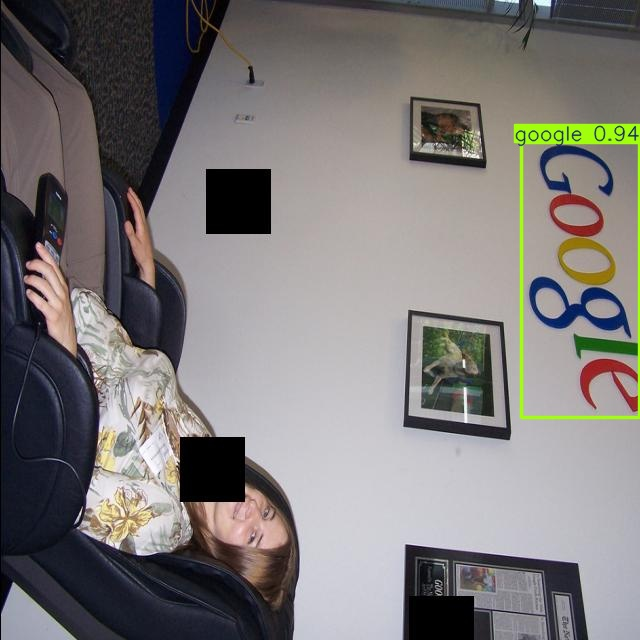

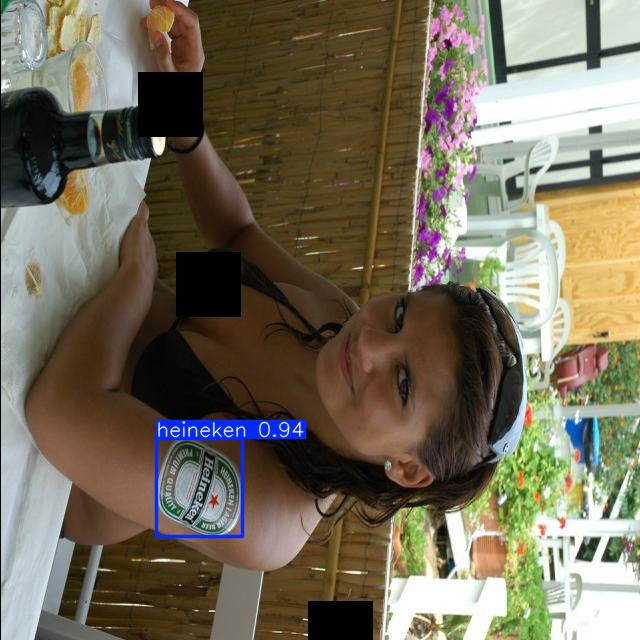

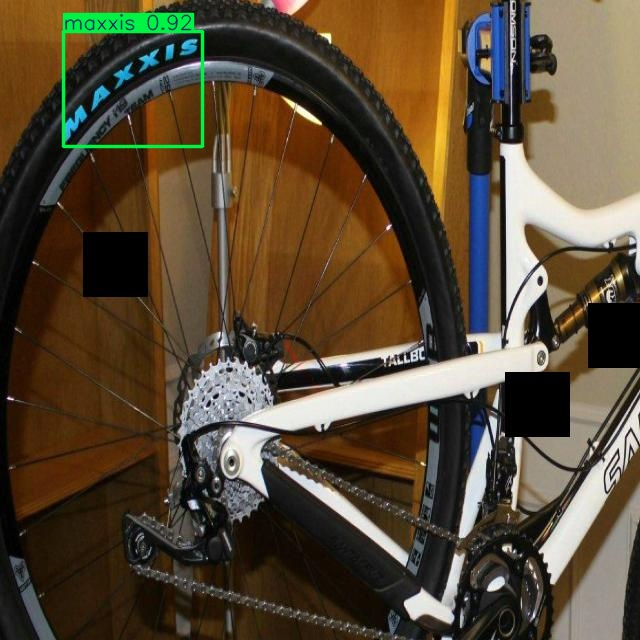

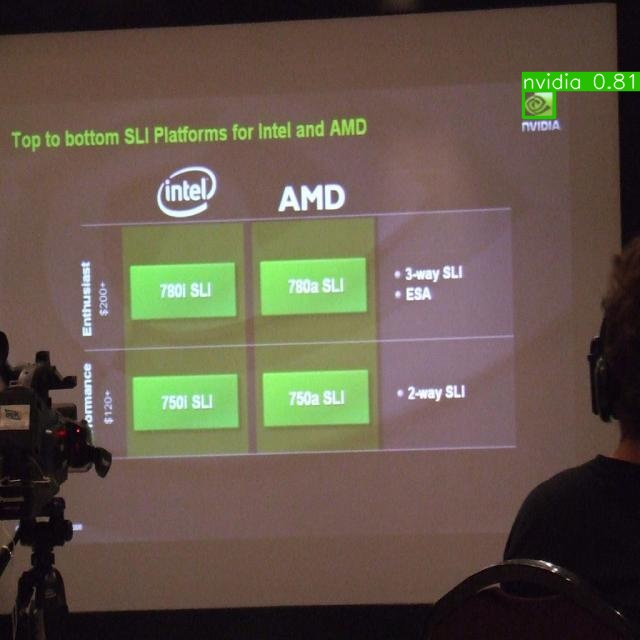

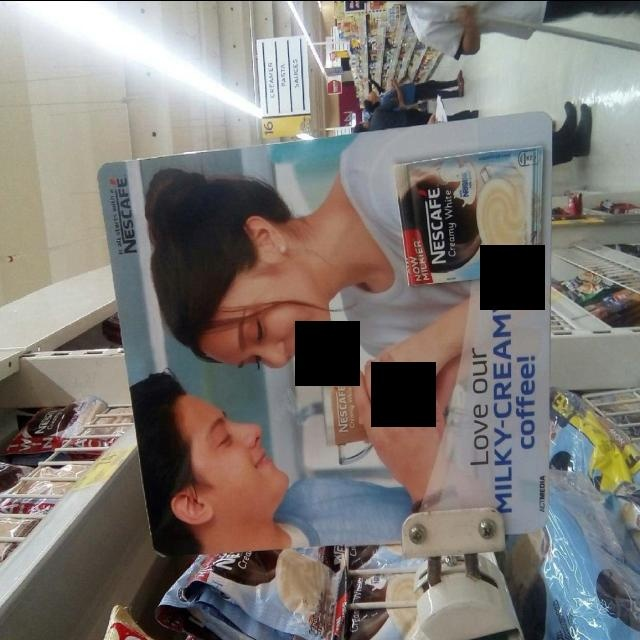

In [18]:
from IPython.display import Image, display
import glob

# Show first 5 predicted images                                                         #TRAIN IMAGES OUTPUT
for image_path in glob.glob('/content/logo/runs/detect/predict/*.jpg')[:5]:
    display(Image(filename=image_path))

In [19]:
from google.colab import drive                                                           #used to connect drive with googlecolab
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
# Copy the folder to your Google Drive                                              #used to move file from any location to any location
!cp -r /content/logo.zip  /content/drive/MyDrive/logo/

^C


In [4]:
# Load the trained model
from ultralytics import YOLO

model = YOLO('/content/logo/runs/detect/train/weights/best.pt')

# Run detection on test images                                                                  #TEST IMAGES
results = model.predict(
    source='/content/logo/logo-detection-1/test/images',
    save=True,
    conf=0.25  # confidence threshold
)


image 1/474 /content/logo/logo-detection-1/test/images/117318849_jpg.rf.f4b170a9eeb42010deaac4c0e4991f17.jpg: 640x640 1 nvidia, 19.4ms
image 2/474 /content/logo/logo-detection-1/test/images/1204557649_jpg.rf.73551ba824baff36921ef99ddb981c0c.jpg: 640x640 1 heineken, 16.8ms
image 3/474 /content/logo/logo-detection-1/test/images/1204557649_jpg.rf.ae6b2f6c2e91349353ed1438b4e3569c.jpg: 640x640 1 heineken, 16.4ms
image 4/474 /content/logo/logo-detection-1/test/images/2124187021_jpg.rf.421d29e000115235b3721be53174586d.jpg: 640x640 1 google, 16.4ms
image 5/474 /content/logo/logo-detection-1/test/images/2147897497_jpg.rf.c1249503f33021854817c713fe5efd8e.jpg: 640x640 1 singha, 16.4ms
image 6/474 /content/logo/logo-detection-1/test/images/2325670467_jpg.rf.70630363eee5c7f3e01897d59ff3e521.jpg: 640x640 1 google, 16.4ms
image 7/474 /content/logo/logo-detection-1/test/images/234136507_jpg.rf.feb000606e6e64eb58178ed3400cff6b.jpg: 640x640 1 becks, 16.4ms
image 8/474 /content/logo/logo-detection-1/tes

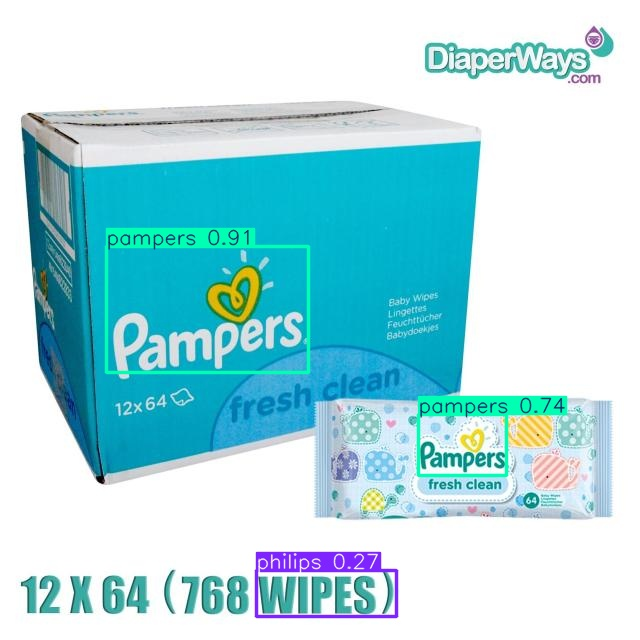

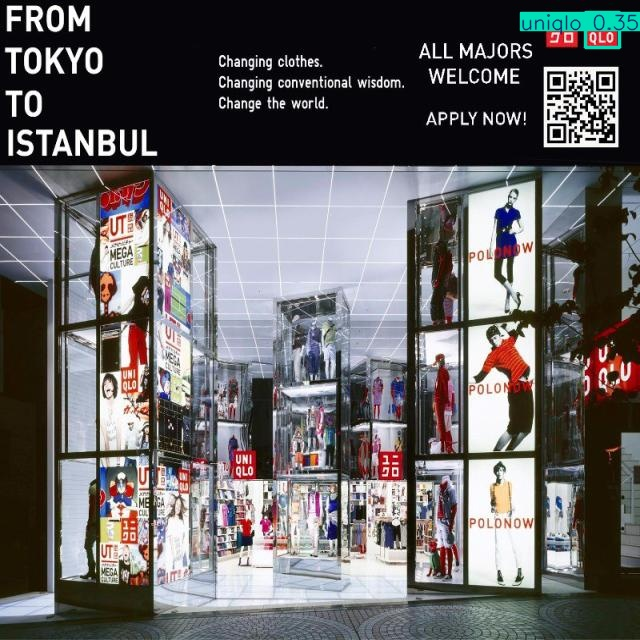

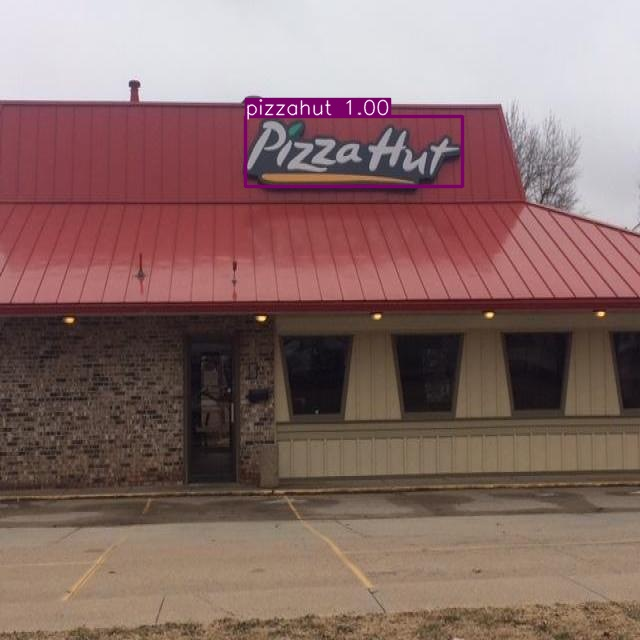

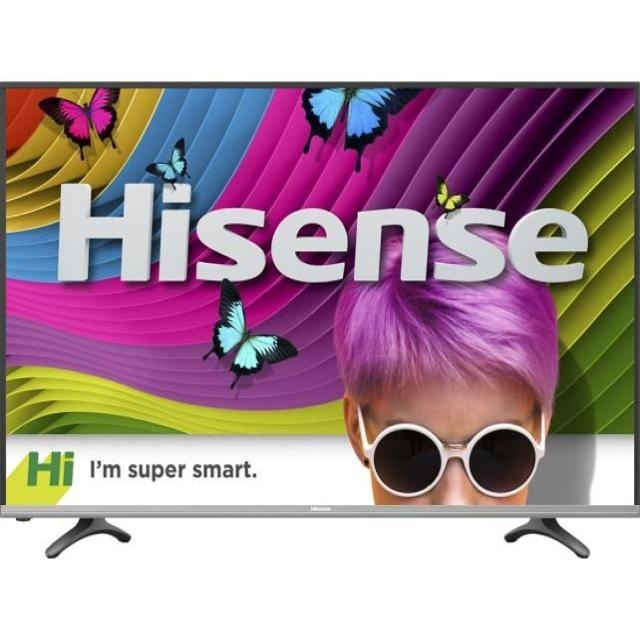

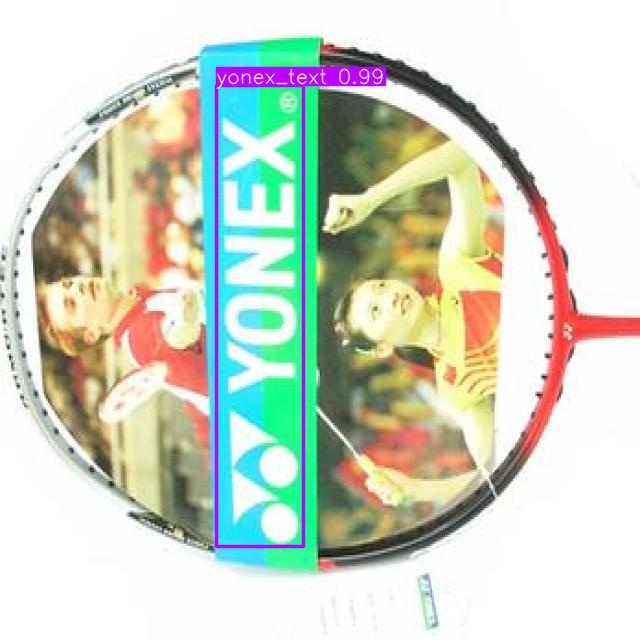

In [12]:
from IPython.display import Image, display
import glob

# Display the first 5 predicted test images
for img_path in glob.glob('/content/logo/runs/detect/predict1*/' + '*.jpg')[:5]:                 #TEST IMAGES OUTPUT
    display(Image(filename=img_path))

In [15]:
from ultralytics import YOLO

# Load the trained model
model = YOLO('//content/logo/runs/detect/train/weights/best.pt')

# Predict on validation images                                                                      #VALID IMAGES
model.predict(
    source='/content/logo/logo-detection-1/valid/images',
    save=True,
    conf=0.25,
    imgsz=640
)


image 1/939 /content/logo/logo-detection-1/valid/images/112818523_jpg.rf.097c4d06d5f62e4406176d64e4108db3.jpg: 640x640 1 visa, 16.4ms
image 2/939 /content/logo/logo-detection-1/valid/images/1168071754_jpg.rf.10f6528417098382bc1be75c80a62c04.jpg: 640x640 1 singha, 16.4ms
image 3/939 /content/logo/logo-detection-1/valid/images/122836650_jpg.rf.ed92f40025a253aeb0ccc8337495a728.jpg: 640x640 1 singha, 16.4ms
image 4/939 /content/logo/logo-detection-1/valid/images/157883248_jpg.rf.0ee6818dadfd8bc268886546ec004ee4.jpg: 640x640 3 heinekens, 16.4ms
image 5/939 /content/logo/logo-detection-1/valid/images/1672560417_jpg.rf.b29c5566b863629ab400995ed4c31e4b.jpg: 640x640 1 google, 16.4ms
image 6/939 /content/logo/logo-detection-1/valid/images/1699850882_jpg.rf.0644638c6909369982abb75506dee8a3.jpg: 640x640 1 becks, 16.4ms
image 7/939 /content/logo/logo-detection-1/valid/images/1715240197_jpg.rf.524abb8db632fbf975861004492091ec.jpg: 640x640 1 nvidia, 16.4ms
image 8/939 /content/logo/logo-detection-1/

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'adidas1', 1: 'allianz', 2: 'allianz_text', 3: 'anz', 4: 'aral', 5: 'audi', 6: 'audi_text', 7: 'base', 8: 'becks', 9: 'bem', 10: 'blackmores', 11: 'bosch', 12: 'bosch_text', 13: 'burgerking_text', 14: 'canon', 15: 'chanel', 16: 'citroen_text', 17: 'dexia', 18: 'esso_text', 19: 'google', 20: 'heineken', 21: 'hisense', 22: 'hm', 23: 'huawei', 24: 'huawei_text', 25: 'jurlique', 26: 'lacoste', 27: 'lays', 28: 'maxxis', 29: 'mcdonalds_text', 30: 'mercedesbenz', 31: 'nescafe', 32: 'nike_text', 33: 'nvidia', 34: 'pampers', 35: 'philips', 36: 'pizzahut', 37: 'planters', 38: 'rolex', 39: 'rolex_text', 40: 'singha', 41: 'toyota', 42: 'umbro', 43: 'uniqlo', 44: 'us_president', 45: 'verizon', 46: 'verizon_text', 47: 'visa', 48: 'williamhill', 49: 'yonex_text'}
 obb: None
 orig_img: array([[[ 47,  42,  33],
         [ 62,  59,  51],
         [ 56,  

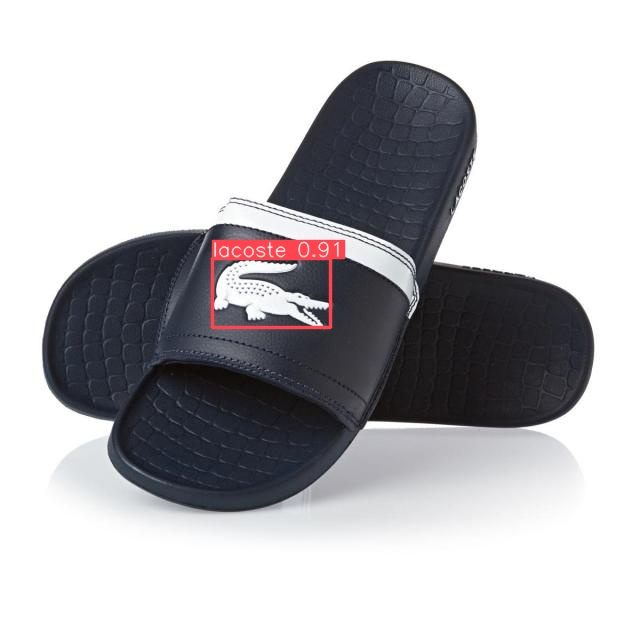

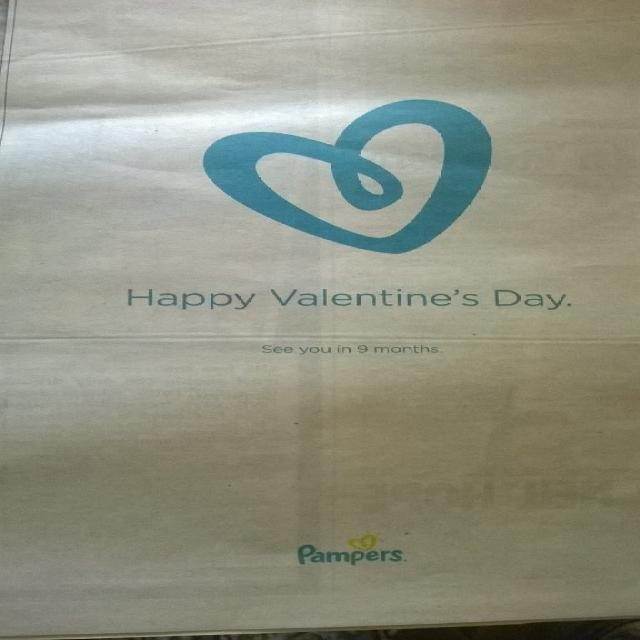

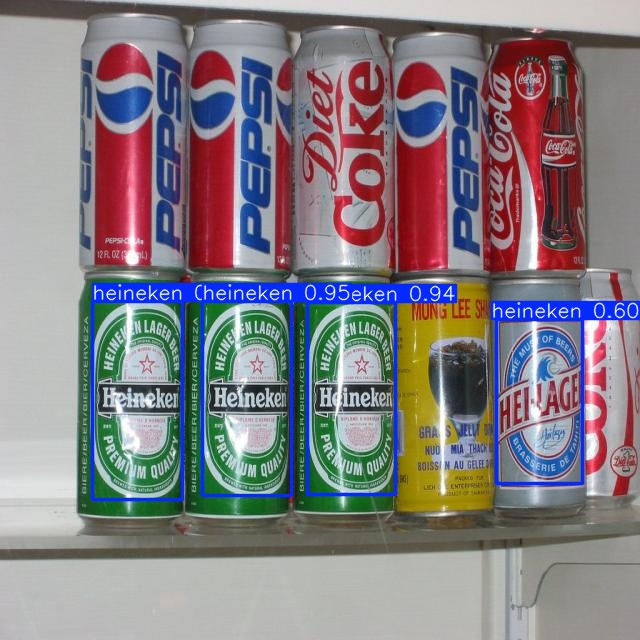

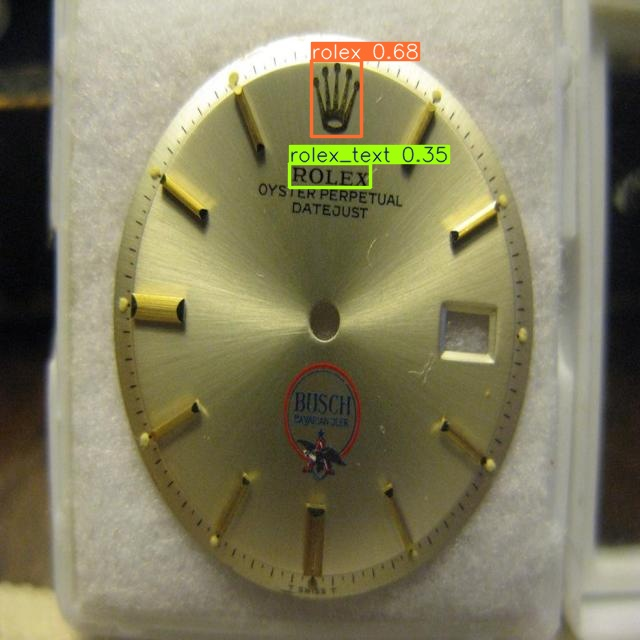

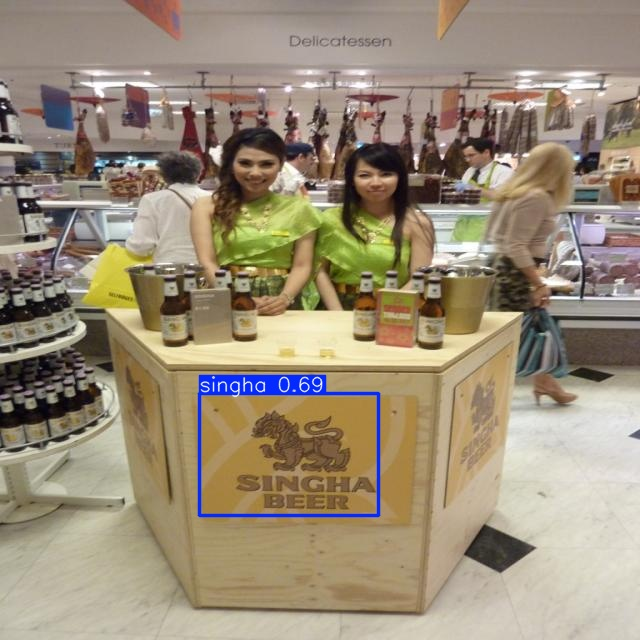

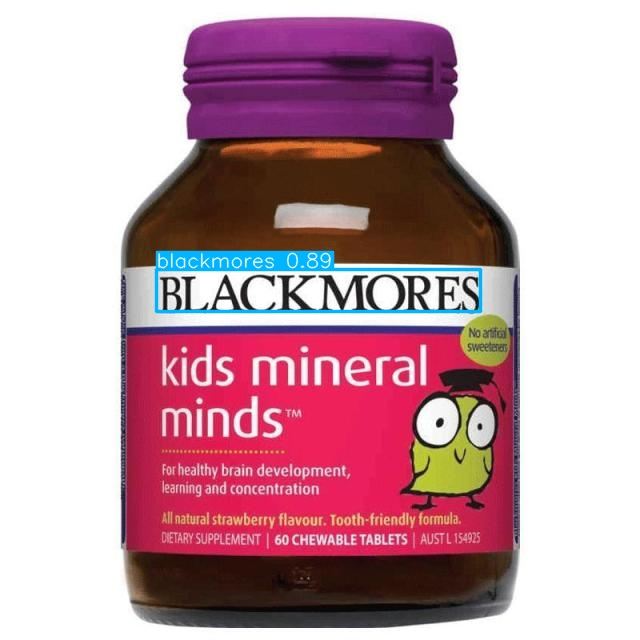

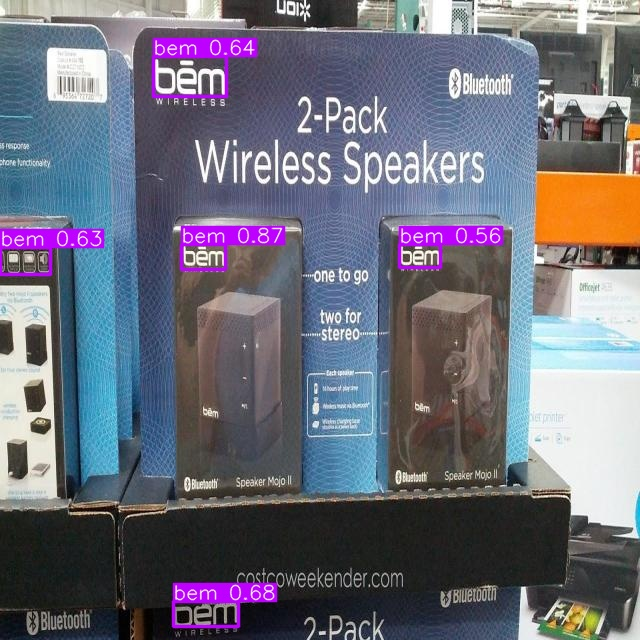

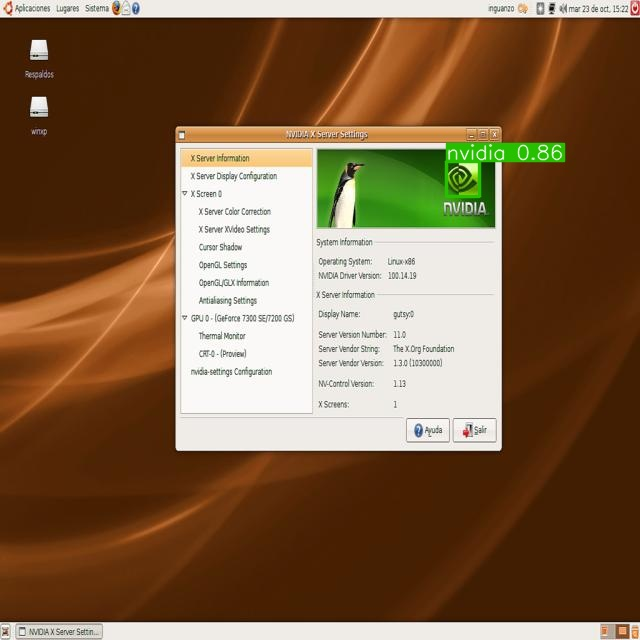

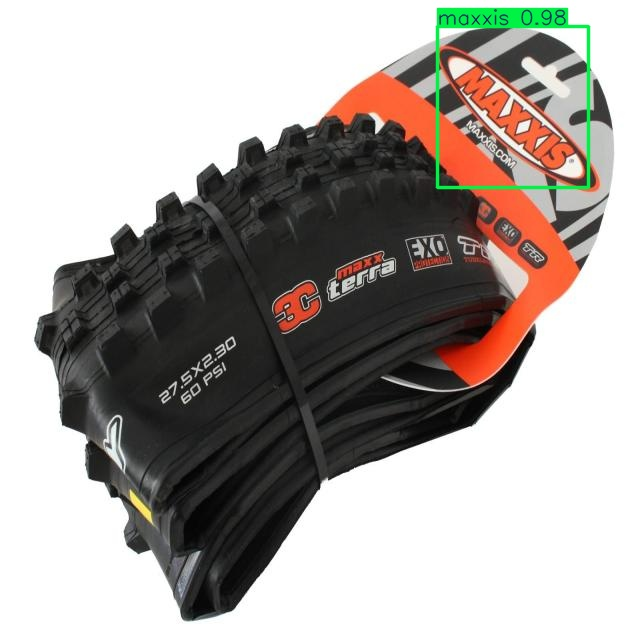

In [19]:
from IPython.display import Image, display
import glob
                                                                                                 #  VALID IMAGES OUTPUT
# Display a few predicted validation images
for img_path in glob.glob('/content/logo/runs/detect/predict2/*.jpg')[:9]:
    display(Image(filename=img_path))


In [25]:
import shutil                                                                                 #used to make zip file
shutil.make_archive('/content/logo','zip','/content/logo')

'/content/logo.zip'

In [26]:
from google.colab import files                                                                 #used to download files
files.download('/content/logo.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>